In [254]:
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from time import time

## A. Implement 1D Convolution in Python (no libraries)

### 1. Without using for loops 

In [255]:
import numpy as np

def convolve1d(signal, kernel):
    signal_len = len(signal)
    kernel_len = len(kernel)
    
    # adjust the output length for full convolution
    result_len = signal_len + kernel_len - 1
    
    # zero pad the signal on both sides
    padded_signal = np.pad(signal, (kernel_len - 1, kernel_len - 1), mode='constant')
    
    # create a matrix where each column is a shifted segment of the padded signal, with the shift as the kernel size
    toeplitz_mat = np.zeros((kernel_len, result_len))
    for i in range(result_len):
        toeplitz_mat[:, i] = padded_signal[i:i + kernel_len]
    
    # flip the kernel for convolution
    flipped_kernel = np.flip(kernel)
    
    # perform the convolution using matrix multiplication (dot product of the flipped kernel and the toeplitz matrix)
    result = np.dot(flipped_kernel, toeplitz_mat)
    
    return result

def convolution(x, h):
    x = np.array(x, dtype=np.float32)
    h = np.array(h, dtype=np.float32)

    # perform full convolution
    y = convolve1d(x, h)
    return y

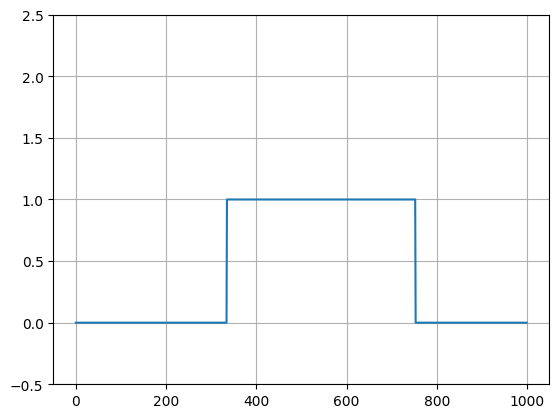

In [256]:
t = np.linspace(0.15, 0.35, 1000, endpoint=False)

plt.ylim(-0.5, 2.5)
sig1 = signal.square(2 * np.pi * 5.99 * t+4.4)+1
sig1 = sig1/2
plt.plot(sig1)
plt.grid('on')

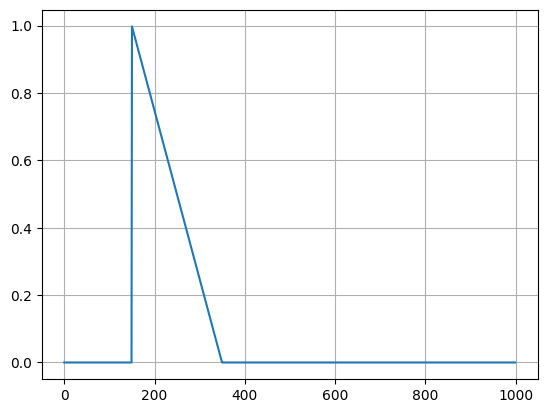

In [257]:
sigt = np.zeros_like(sig1)
sigt[150:350] = signal.triang(400)[200:]
plt.plot(sigt)
plt.grid('on')

In [258]:
len(sigt)

1000

(1999,)
0.036791086196899414


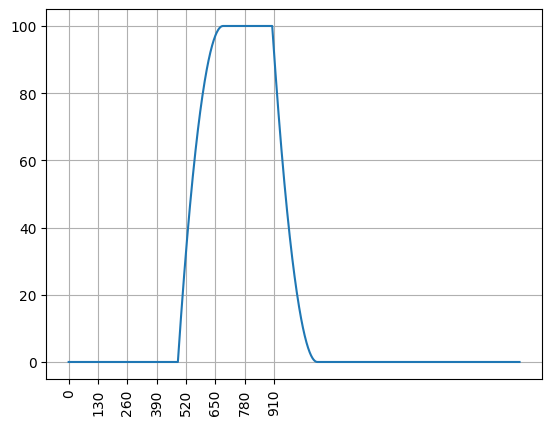

In [259]:
from time import time

start_vanilla = time()
y_1 = convolution(sig1,sigt)
# y_1 = final_matrix(sig1,sigt)
time_vanilla = time()-start_vanilla
print(y_1.shape)
plt.plot(y_1)
plt.grid('on')
_=plt.xticks(np.arange(0,1000,130),rotation=90)
print(time_vanilla)

0.0011970996856689453


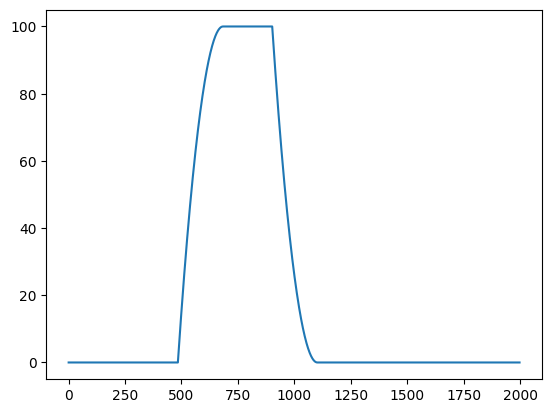

In [260]:
start = time()
y_1np = np.convolve(sig1,sigt,'full')
time_np = time()-start
plt.plot(y_1np)
print(time_np)

In [261]:
difference = time_vanilla - time_np
print("Vanilla implementation using vectorisation:",time_vanilla,"(Python)")
print("Library implementation using numpy:",time_np,"Primarily C with some features in Python and C++")
print("Difference:",difference)

Vanilla implementation using vectorisation: 0.036791086196899414 (Python)
Library implementation using numpy: 0.0011970996856689453 Primarily C with some features in Python and C++
Difference: 0.03559398651123047


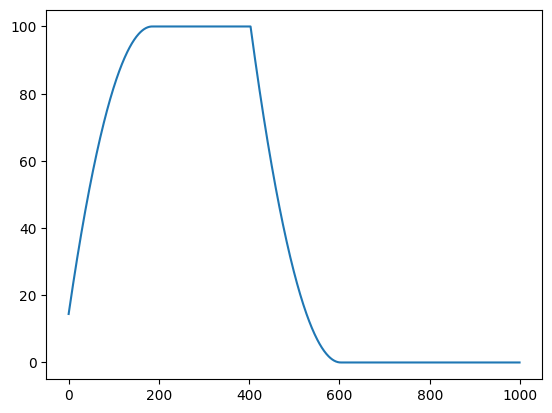

In [262]:
plt.plot(np.convolve(sig1,sigt,'same'))

In [263]:
np.convolve(sig1,sigt,'valid')

array([26.5225])

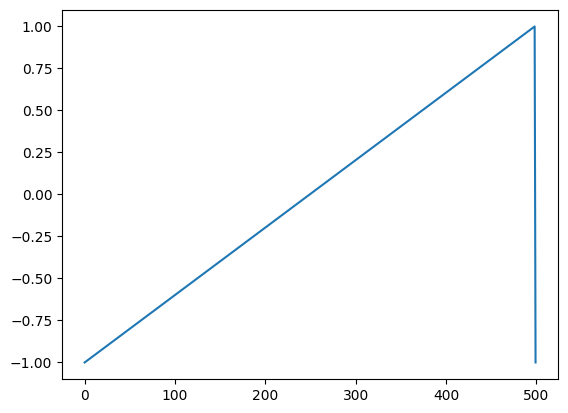

In [264]:
t = np.linspace(0, 0.2, 500)

sig2 = signal.sawtooth(2 * np.pi * 5 * t)
plt.plot(sig2)

In [265]:
out = convolution(sig1,sig2)

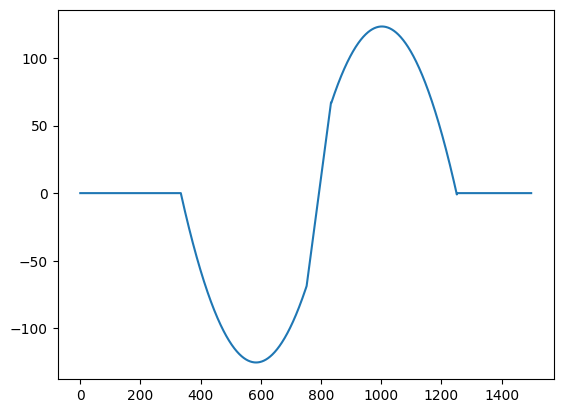

In [266]:
plt.plot(out)
#plt.plot(np.convolve(sig1,sig2,'full'))

In [267]:
out.shape

(1499,)

In [268]:
sig2.shape

(500,)

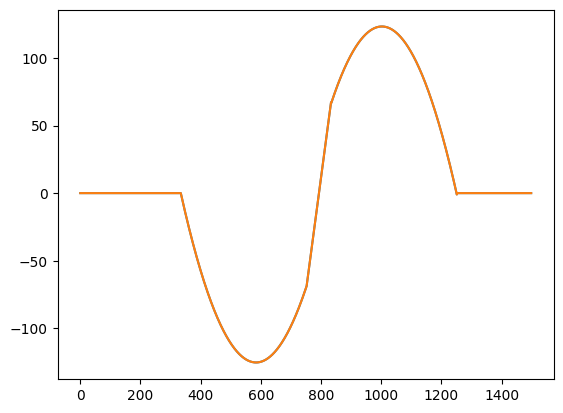

In [269]:
plt.plot(out)
plt.plot(np.convolve(sig1,sig2,'full'))

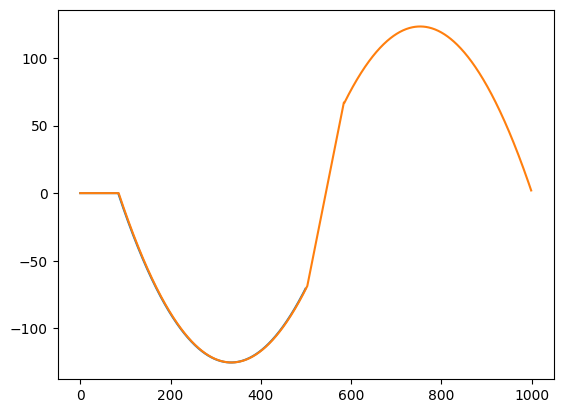

In [270]:
plt.plot(out[250:750])
plt.plot(np.convolve(sig1,sig2,'same'))

(-2.0, 2.0)

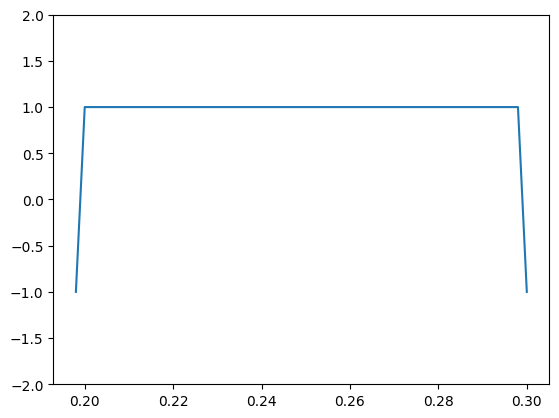

In [271]:
t = np.linspace(0.0, 1.0, 500, endpoint=False)
t1 = t[99:151]
temp = signal.square(2 * np.pi * 5 * t1)
plt.plot(t1,temp)
plt.ylim(-2, 2)

(-2.0, 2.0)

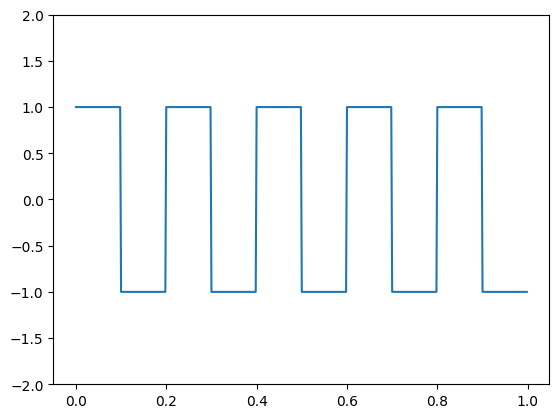

In [272]:
sig1 = signal.square(2 * np.pi * 5 * t)


plt.plot(t,sig1)
plt.ylim(-2, 2.0)

In [273]:
print(temp.shape)
print(sig1.shape)

(52,)
(500,)


In [274]:
np.zeros(3)

array([0., 0., 0.])

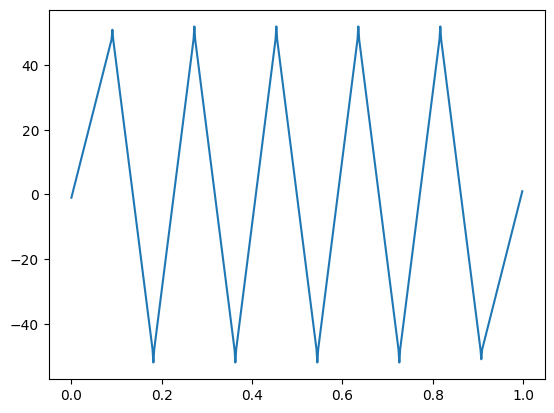

In [275]:
c = convolution(sig1,temp)

t2 = np.linspace(0, 1.0, 551, endpoint=False)
plt.plot(t2,c)

In [276]:
sigN = sig1+np.random.normal(0,2,500)

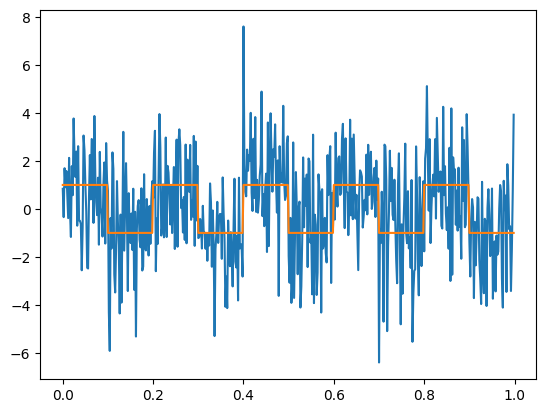

In [277]:
plt.plot(t,sigN)
plt.plot(t,sig1)

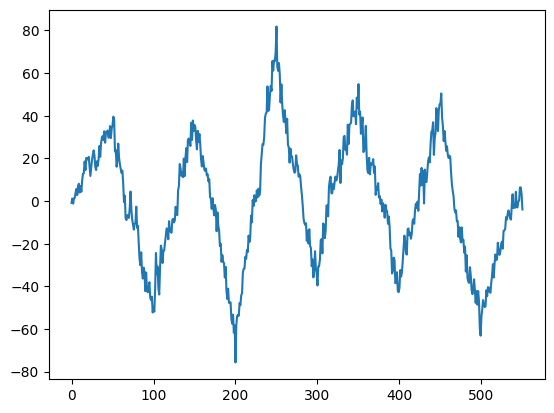

In [278]:
c = np.convolve(sigN,temp)
#t2 = np.linspace(0, 1.0, 551, endpoint=False)
plt.plot(c)

In [279]:
from scipy import signal
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_61134/3409646347.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


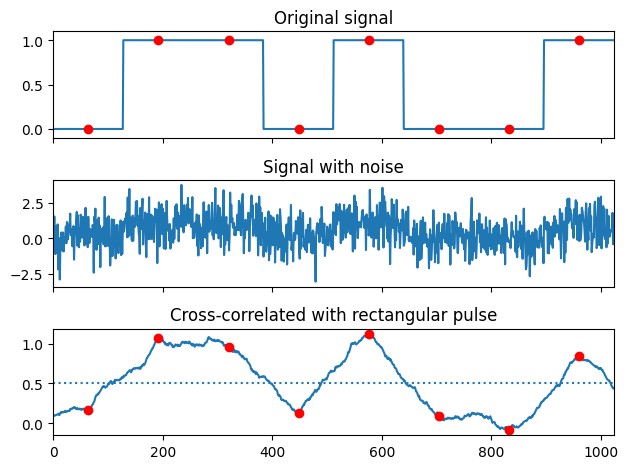

In [280]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

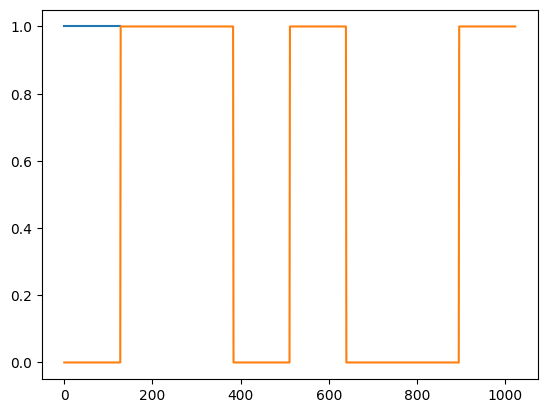

In [281]:
plt.plot(np.ones(128))
plt.plot(sig)